In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
# Step 1: read xlsx
file_path = '...'  # Modify to your Excel file path
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Define intervals and labels
bins = [-float('inf'), 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, float('inf')]
labels = ['<0.5', '0.5-1.5', '1.5-2.5', '2.5-3.5', '3.5-4.5', '4.5-5.5', '5.5-6.5', '>6.5']

# Classify 'SupineAirVolume' into intervals
df['SupineAirVolume_Interval'] = pd.cut(df['SupineAirVolume'], bins=bins, labels=labels, right=False)

# Count the number of Y=0 and Y=1 in each interval
interval_counts = df.groupby(['SupineAirVolume_Interval', 'Y']).size().unstack(fill_value=0)
print(interval_counts)

Y                          0  1
SupineAirVolume_Interval       
<0.5                      11  2
0.5-1.5                    5  2
1.5-2.5                    9  1
2.5-3.5                    1  2
3.5-4.5                    0  0
4.5-5.5                    2  2
5.5-6.5                    1  3
>6.5                       3  8


In [4]:
# Step 2: data preprocessing
# Convert X17 to categorical data type
df['X'] = df['X17'].astype('category')

In [14]:
# Count the number of Y=0 and Y=1 in each group
interval_counts_group = df.groupby(['X', 'Y']).size().unstack(fill_value=0)
print(interval_counts_group)

Y   0  1
X       
1  11  2
2  11  2
3   4  3
4   3  5
5   3  8


In [5]:
df['X']

0     3
1     5
2     4
3     5
4     1
5     2
6     2
7     3
8     1
9     2
10    1
11    2
12    4
13    1
14    1
15    4
16    1
17    5
18    5
19    4
20    3
21    1
22    3
23    1
24    3
25    3
26    2
27    2
28    2
29    5
30    5
31    4
32    1
33    5
34    2
35    2
36    1
37    1
38    4
39    1
40    3
41    2
42    4
43    2
44    2
45    5
46    5
47    4
48    2
49    5
50    5
51    1
Name: X, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

In [6]:
# get dummy, set constant and turn into int type for Logistic regression model
X_encoded = pd.get_dummies(df['X'], drop_first=True)
X_encoded = sm.add_constant(X_encoded)
X_encoded = X_encoded.astype(int)
y = df['Y']

In [10]:
X_encoded

,const,2,3,4,5
0,1,0,1,0,0
1,1,0,0,0,1
2,1,0,0,1,0
3,1,0,0,0,1
4,1,0,0,0,0
5,1,1,0,0,0
6,1,1,0,0,0
7,1,0,1,0,0
8,1,0,0,0,0
9,1,1,0,0,0


In [15]:
print(y.dtypes)

int64


In [16]:
print(X_encoded.dtypes)

const    int32
2        int32
3        int32
4        int32
5        int32
dtype: object


In [17]:
# fit Logistic regression
logit_model_X = sm.Logit(y, X_encoded)
result_X = logit_model_X.fit()

# Use the built-in logistic function parameters to extract coefficients, standard errors, 95% confidence intervals, and P-values
coef_X = result_X.params
std_err_X = result_X.bse
ci_lower_X = result_X.conf_int()[0]
ci_upper_X = result_X.conf_int()[1]
p_values_X = result_X.pvalues

# llr_pvalue log likelihood ratio test p value = model p value
model_p_value_X = result_X.llr_pvalue

# save the parameters to new dataframe
report_X_extended = pd.DataFrame({
    "Coefficients": coef_X,
    "Std Errors": std_err_X,
    "CI Lower 95%": ci_lower_X,
    "CI Upper 95%": ci_upper_X,
    "P-values": p_values_X
})

# add on model p value
report_X_extended.loc['Model P-value'] = ['', '', '', '', model_p_value_X]

Optimization terminated successfully.
         Current function value: 0.532322
         Iterations 6


In [23]:
print(report_X_extended)

              Coefficients Std Errors CI Lower 95% CI Upper 95%  P-values
const            -1.704748   0.768706    -3.211384    -0.198112  0.026576
2                      0.0   1.087115    -2.130705     2.130705  1.000000
3                 1.417066   1.083625    -0.706799     3.540931  0.190972
4                 2.215574   1.060303     0.137418     4.293729  0.036657
5                 2.685577   1.024325     0.677937     4.693218  0.008747
Model P-value                                                    0.007517


In [20]:
# Create the DataFrame
report_X_extended_out = pd.DataFrame(report_X_extended)

# Save to CSV
report_X_extended_out.to_csv('model_p.csv', index=False)

report_X_extended

,Coefficients,Std Errors,CI Lower 95%,CI Upper 95%,P-values
const,-1.704748,0.768706,-3.211384,-0.198112,0.026576
2,0.0,1.087115,-2.130705,2.130705,1.000000
3,1.417066,1.083625,-0.706799,3.540931,0.190972
4,2.215574,1.060303,0.137418,4.293729,0.036657
5,2.685577,1.024325,0.677937,4.693218,0.008747
Model P-value,,,,,0.007517


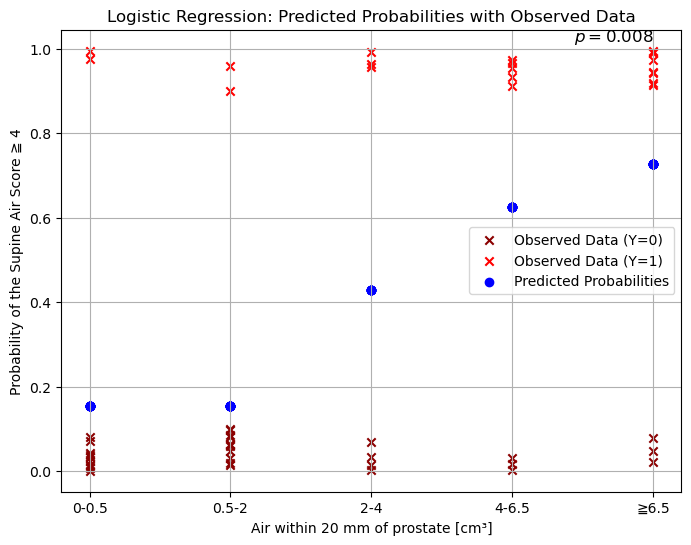

In [26]:
# Plot the results
# Calculate the predicted probability for each category.
fitted_probs_X_corrected = result_X.predict(X_encoded)

# Calculate the number of Y=1 and Y=0 for each X8 category to display the number of observed data points.
y_0_counts = df[df['Y'] == 0]['X'].value_counts().sort_index()
y_1_counts = df[df['Y'] == 1]['X'].value_counts().sort_index()

plt.figure(figsize=(8, 6))

# Plot the data points for Y=0 using a different shade of red.
for i, count in enumerate(y_0_counts):
    plt.scatter([i] * count, np.random.uniform(0, 0.1, size=count), color='#8B0000', marker='x', label='Observed Data (Y=0)' if i == 0 else "")

# Plot the data points for Y=1.
for i, count in enumerate(y_1_counts):
    plt.scatter([i] * count, np.random.uniform(0.9, 1, size=count), color='red', marker='x', label='Observed Data (Y=1)' if i == 0 else "")

# Plot predicted probabilities for each category
plt.scatter(df['X'].cat.codes, fitted_probs_X_corrected, color='blue', label='Predicted Probabilities')

# Customize X and Y axis labels
plt.xlabel('Air within 20 mm of prostate [cm³]')
plt.ylabel('Probability of the Supine Air Score ≧ 4')

# Set the labels for the X-axis.
x_labels = ['0-0.5', '0.5-2', '2-4', '4-6.5', '≧6.5']
plt.xticks(ticks=np.arange(5), labels=x_labels)

# Add a P-value annotation in the top right corner, with the P-value in italics.
plt.text(4, 1.05, r'$p = 0.008$', fontsize=12, color='black', ha='right', va='top')

# Add title and legend
plt.title('Logistic Regression: Predicted Probabilities with Observed Data')
plt.legend()
plt.grid(True)

'''
output_path = 'predicted_probabilities_plot.svg'
plt.savefig(output_path, format='svg')
'''

plt.show()


In [23]:
output_path = 'predicted_probabilities_plot.svg'
plt.savefig(output_path, format='svg')

output_path

'predicted_probabilities_plot.svg'

<Figure size 640x480 with 0 Axes>